In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('../../output/corr_mi_tasks_large.csv')

In [40]:
#df = df.dropna()

# df = df[~df['metadata/Decoding config'].str.contains('short')]
display(df)
print(df.columns)


# tasks names
tasks_names = [c.split('/')[0] for c in df.columns if "kl" in c]
print(tasks_names)

,Unnamed: 0,metadata/Embedding model,metadata/Decoding config,metadata/Date,metadata/Model name,metadata/Dataset name,I(text -> summary),H(summary),H(summary|text),I(summary -> text),...,cardiffnlp_tweet-topic-21-multi/kl,SamLowe_roberta-base-go_emotions/l2,SamLowe_roberta-base-go_emotions/l1,SamLowe_roberta-base-go_emotions/dot,SamLowe_roberta-base-go_emotions/kl,wesleyacheng_news-topic-classification-with-bert/l2,wesleyacheng_news-topic-classification-with-bert/l1,wesleyacheng_news-topic-classification-with-bert/dot,wesleyacheng_news-topic-classification-with-bert/kl,wesleyacheng_news-topic-classification-with-bert/proba_of_error
0,google_pegasus-multi_news-_-rotten_tomatoes-_-...,paraphrase-MiniLM-L6-v2,beam_sampling_long,2023-11-04-00-17-30,google_pegasus-multi_news,rotten_tomatoes,41.110630,30.718418,-10.392211,63.024484,...,144.349404,78.690288,32.863781,920.466908,186.256749,7.996937,4.350634,2.502489,13.764305,0.610800
1,google_pegasus-arxiv-_-xsum-_-beam_sampling_lo...,paraphrase-MiniLM-L6-v2,beam_sampling_long,2023-11-04-01-01-45,google_pegasus-arxiv,xsum,52.422649,53.154595,0.731946,43.368512,...,NaN,77.092392,33.514130,973.169289,237.968607,19.902692,5.923175,9.789791,18.465202,0.454900
2,sshleifer_distill-pegasus-cnn-16-4-_-rotten_to...,paraphrase-MiniLM-L6-v2,top_p_sampling,2023-11-03-22-45-26,sshleifer_distill-pegasus-cnn-16-4,rotten_tomatoes,NaN,89.228539,NaN,83.159133,...,NaN,28.285168,15.771753,973.080880,201.704025,1.699418,1.703937,3.293616,10.705104,0.276100
3,google_pegasus-large-_-rotten_tomatoes-_-beam_...,paraphrase-MiniLM-L6-v2,beam_sampling_short,2023-11-03-22-48-11,google_pegasus-large,rotten_tomatoes,130.949371,151.274949,20.325577,60.896729,...,107.603782,76.867896,30.858240,1003.456356,243.329855,2.470814,2.240672,1.288991,9.449498,0.490000
4,facebook_bart-large-cnn_rotten_tomatoes_top_p_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137.158175,27.578449,17.801858,951.585641,189.498176,3.062544,2.435721,3.090908,11.496826,0.441100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,sshleifer_distill-pegasus-cnn-16-4-_-rotten_to...,paraphrase-MiniLM-L6-v2,beam_sampling_short,2023-11-03-21-59-19,sshleifer_distill-pegasus-cnn-16-4,rotten_tomatoes,146.468131,163.623009,17.154879,64.254734,...,117.163598,83.711987,32.457923,1001.180073,252.083820,2.694124,2.347350,1.744302,9.974278,0.469600
93,google_pegasus-multi_news_rotten_tomatoes_beam...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144.267796,78.692701,32.874540,920.446974,185.893280,7.871063,4.328575,2.546238,13.714234,0.612800
94,google_pegasus-large-_-rotten_tomatoes-_-top_p...,paraphrase-MiniLM-L6-v2,top_p_sampling,2023-11-03-23-25-20,google_pegasus-large,rotten_tomatoes,17.976258,76.423666,58.447409,92.449475,...,125.200192,9.131606,4.711073,969.313037,193.483187,0.494451,0.479902,3.164706,9.975007,0.105600
95,google_pegasus-large_peer_read_beam_sampling_v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,90.536346,35.059452,1036.883620,261.554330,22.886215,8.148908,5.486246,10.870721,0.327829


Index(['Unnamed: 0', 'metadata/Embedding model', 'metadata/Decoding config',
       'metadata/Date', 'metadata/Model name', 'metadata/Dataset name',
       'I(text -> summary)', 'H(summary)', 'H(summary|text)',
       'I(summary -> text)', 'H(text)', 'H(test|summary)',
       'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/l2',
       'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/l1',
       'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/dot',
       'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/kl',
       'cardiffnlp_tweet-topic-21-multi/l2',
       'cardiffnlp_tweet-topic-21-multi/l1',
       'cardiffnlp_tweet-topic-21-multi/dot',
       'cardiffnlp_tweet-topic-21-multi/kl',
       'SamLowe_roberta-base-go_emotions/l2',
       'SamLowe_roberta-base-go_emotions/l1',
       'SamLowe_roberta-base-go_emotions/dot',
       'SamLowe_roberta-base-go_emotions/kl',
       'wesleyacheng_news-topic-classification-

In [4]:


df['source'] = df["Unnamed: 0"]
df['dataset'] = df["Unnamed: 0"].map(lambda x: "peer_reviews" if "peer" in x else "rotten_tomatoes")





In [9]:


for task in tasks_names:
    for metric in ['l2', 'l1', 'kl', 'dot']:
        print(task)

        sns.set_theme(style="whitegrid")
        ax =sns.lmplot(data=df, x="I(summary -> text)", y=f"{task}/{metric}", col="metadata/Dataset name", facet_kws={'sharey': False, 'sharex': False},)

        # change y title to be more readable
        ax.set(ylabel=metric)

        # save figure
        plt.savefig(f"../../../papers/Mutual-information-for-summarization/img/{task}_{metric}.png", dpi=300, bbox_inches='tight')
        plt.clf()





mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis
mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis
mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis
mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis
cardiffnlp_tweet-topic-21-multi
cardiffnlp_tweet-topic-21-multi
cardiffnlp_tweet-topic-21-multi
cardiffnlp_tweet-topic-21-multi
SamLowe_roberta-base-go_emotions
SamLowe_roberta-base-go_emotions
SamLowe_roberta-base-go_emotions
SamLowe_roberta-base-go_emotions
wesleyacheng_news-topic-classification-with-bert
wesleyacheng_news-topic-classification-with-bert
wesleyacheng_news-topic-classification-with-bert
wesleyacheng_news-topic-classification-with-bert


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

In [27]:

# List of datasets
datasets = df['metadata/Dataset name'].dropna().unique()

for dataset in datasets:
    
    # plot I(summary -> text) for each model
    sns.set_theme(style="whitegrid")
    # keep only top_p_sampling
    df_top_p = df[df['metadata/Decoding config'] == 'top_p_sampling']
    # select dataset
    df_top_p = df_top_p[df_top_p['metadata/Dataset name'] == dataset]
    
    ax =sns.barplot(data=df_top_p, y="metadata/Model name", x="I(summary -> text)", orient="h")
    
    # change y title to be more readable
    ax.set(ylabel="Model name")
    
    # change xlim based to be a little bit less than the min and a little bit more than the max
    ax.set_xlim([df_top_p['I(summary -> text)'].min() - 5, df_top_p['I(summary -> text)'].max() + 5])
    
    # save figure
    plt.savefig(f"../../../papers/Mutual-information-for-summarization/img/model_comparison/{dataset}_top_p.png", dpi=300, bbox_inches='tight')
    plt.clf()
    


<Figure size 640x480 with 0 Axes>

In [49]:




ddf = df.drop('Unnamed: 0', axis=1)
# df = df.set_index([metadata for metadata in df.columns if "metadata" in metadata])
ddf = ddf.melt(id_vars=[metadata for metadata in ddf.columns if "metadata" in metadata] ,var_name="Score", value_name="Value")







/tmp/ipykernel_34493/2304156311.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/l2'),
 Text(1, 0, 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/l1'),
 Text(2, 0, 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/dot'),
 Text(3, 0, 'mrm8488_distilroberta-finetuned-financial-news-sentiment-analysis/kl'),
 Text(4, 0, 'cardiffnlp_tweet-topic-21-multi/l2'),
 Text(5, 0, 'cardiffnlp_tweet-topic-21-multi/l1'),
 Text(6, 0, 'cardiffnlp_tweet-topic-21-multi/dot'),
 Text(7, 0, 'cardiffnlp_tweet-topic-21-multi/kl'),
 Text(8, 0, 'SamLowe_roberta-base-go_emotions/l2'),
 Text(9, 0, 'SamLowe_roberta-base-go_emotions/l1'),
 Text(10, 0, 'SamLowe_roberta-base-go_emotions/dot'),
 Text(11, 0, 'SamLowe_roberta-base-go_emotions/kl'),
 Text(12, 0, 'wesleyacheng_news-topic-classification-with-bert/l2'),
 Text(13, 0, 'wesleyacheng_news-topic-classification-with-bert/l1'),
 Text(14, 0, 'wesleyacheng_news-topic-classification-with-bert/dot'),
 Text(15, 0, 'wesleyacheng_news-top

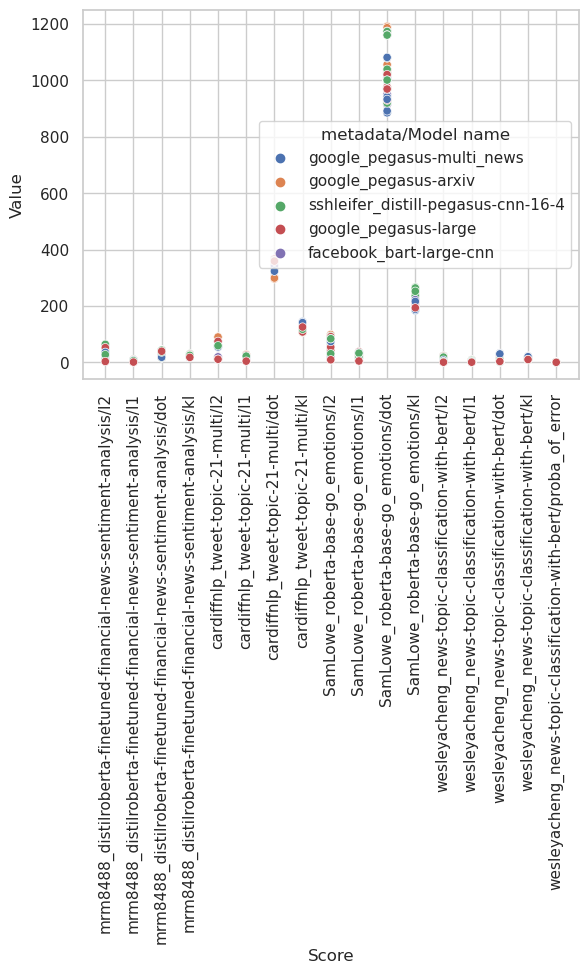

In [52]:
# keep only longer Score
toplot= ddf[ddf['Score'].apply(len) >= 20]

ax = sns.scatterplot(data=toplot, x="Score", y="Value", hue="metadata/Model name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)